# **Assignment: Python for Machine Learning**
### Completed by Michelle Gordon
- Use one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). Be sure to review the readings before you start on this assignment. 
- Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points) .
- Finally, plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Import and format the Arryhthmia data file

In [3]:
df = pd.read_csv('arrhythmia.data', header=None)
features = [0, 2, 3, 6] # these are the columns I am interested in
df = df.dropna(subset=features) # drop records with null values in columns I am interested in
data = df[features].copy() # create new dataset with just the columns of data I want
data.columns = ['Age', 'Height', 'Weight', 'Q-T Interval'] # rename columns for readability


### Standardize the data into z-values

In [5]:
# create scaler object that will standardize the data using z-values
scaler = StandardScaler()
# instead of replacing data with standardized values, add columns to dataframe that hold standardized values
# the "-S" suffix at the end of the column names to to denote they have been standardized
data[['Age-S', 'Height-S', 'Weight-S', 'Q-T Interval-S']] = scaler.fit_transform(data[['Age', 'Height', 'Weight', 'Q-T Interval']])


### Calculate sum of least square error (SSE) and figure out the optimal number of clusters (k) using the Elbow Method

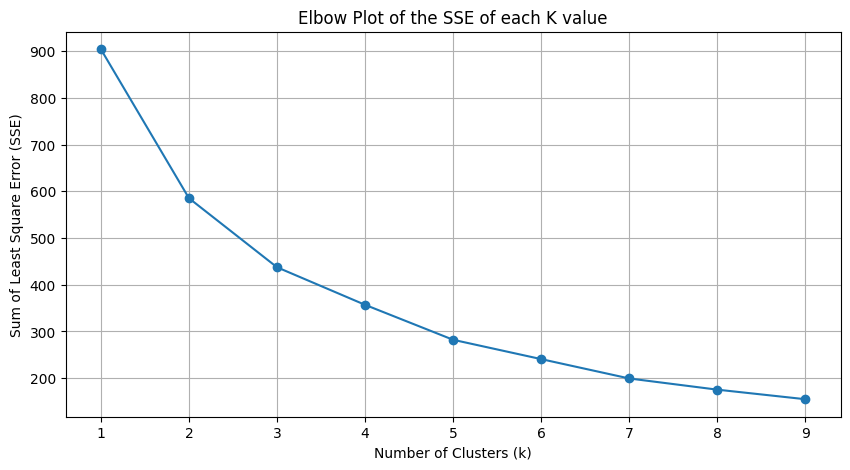

In [6]:
# create function to calculate SSE's and put value in a list for plotting
def optimal_clusters(data, max_k):
    num_clusters = []
    sse_list = []
    # calculate SSE for each k
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        kmeans.fit(data)
        num_clusters.append(k)
        sse_list.append(kmeans.inertia_)

    # generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(num_clusters, sse_list, 'o-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Least Square Error (SSE)')
    plt.grid(True)
    plt.title('Elbow Plot of the SSE of each K value')
    plt.show()

# calculate optimal number of clusters, but only send standardized values into function
# PLEASE NOTE: I opted to only continue with two columns of data, because it seemed to work better than using four columns of data
optimal_clusters(data[['Age-S', 'Q-T Interval-S']], 10)

#### *About the Elbow Graph:*

It looks like 4 or 5 clusters are the optimal number, because the downward slope of the line starts to slow down between 4 and 5 clusters.  However, the slowing of the slope is especially noticeable between 5 and 6 clusters, so I will use 5 for running and plotting the KMeans algorithm on the dataset. 

### Run KMeans cluster algorithm with k=5

In [7]:
kmeans = KMeans(n_clusters=5, n_init='auto') # setup clustering algorithmn
kmeans.fit(data[['Age-S', 'Q-T Interval-S']]) # run algorithm with specified data
data['kmeans_cluster'] = kmeans.labels_ # add cluster number as a new column in the data

### Plot the output of the KMeans algorithm along with the centroids of each cluster

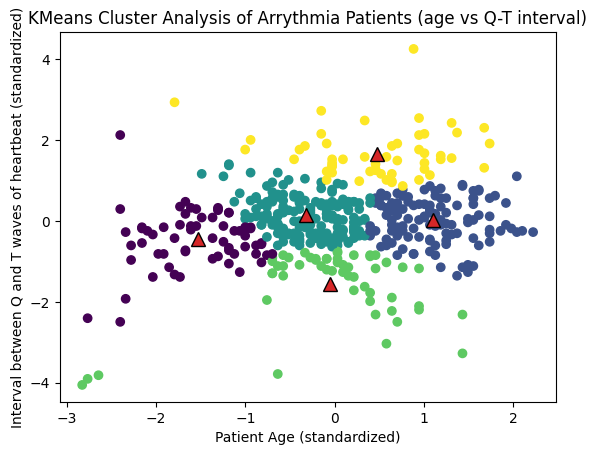

In [17]:
plt.scatter(x=data['Age-S'], y=data['Q-T Interval-S'], c=data['kmeans_cluster']) # scatter plot that shows the clusters
plt.xlabel("Patient Age (standardized)")
plt.ylabel("Interval between Q and T waves of heartbeat (standardized)")
plt.title("KMeans Cluster Analysis of Arrythmia Patients (age vs Q-T interval)")
# because kmeans.cluster_centers_ is an array containing the coordinates of the centroids of each cluster,
# I am going to loop through it to plot each centroid
for centroid in kmeans.cluster_centers_:
    plt.plot(
        centroid[0], # x coordinate of centroid
        centroid[1], # y coordinate of centroid
        "^", #marker shape on this line, and color set in next two lines
        markerfacecolor='tab:red', 
        markeredgecolor="black",
        markersize=10,
    )
plt.show()

### Explanation of the Scatterplot:

I chose to run the KMeans clustering algorithm on the Arrhythmia dataset.  Specifically, I chose to use machine learning to see what kind of clustering exists with regards to a patient's age and the interval of the Q-T waves of their heartbeat.  After running the analysis, it seems that 5 is the optimal amount of clusters to most accurately show the relationship in the data.  The red triangles on the plot denote the centroids of each cluster.  